In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from matplotlib.pyplot import figure
import cmocean.cm as cmo
import seaborn as sns

In [2]:
df = pd.read_csv('../Dissertation_projects/Data/river_discharge/USGS_07374525_Mississippi_River_Belle_Chasse_LA.txt', 
                 index_col=0, skiprows=28, delim_whitespace=True)
df = df.drop('5s')

#Discharge, cubic feet per second (Mean)
df['Discharge'] = df['61182_00060_00003'].astype(float)
df['cd'] = df['61182_00060_00003_cd']
df = df.drop('61182_00060_00003', axis=1)
df = df.drop('61182_00060_00003_cd', axis=1)

df['datetime'] = pd.to_datetime(df['datetime'])

df

,site_no,datetime,Discharge,cd
agency_cd,,,,
USGS,07374525,2021-01-01,430000.0,A
USGS,07374525,2021-01-02,430000.0,A
USGS,07374525,2021-01-03,438000.0,A
USGS,07374525,2021-01-04,454000.0,A
USGS,07374525,2021-01-05,494000.0,A
...,...,...,...,...
USGS,07374525,2022-12-27,484000.0,A
USGS,07374525,2022-12-28,455000.0,A
USGS,07374525,2022-12-29,435000.0,A


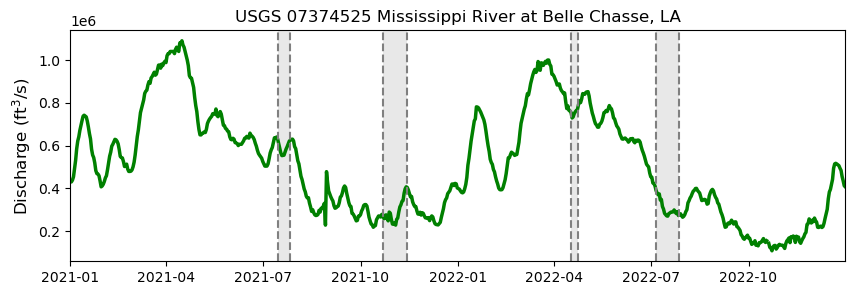

508119.34156378603


In [3]:
# Plotting
plt.figure(figsize=(10, 3))
plt.plot(df['datetime'], df['Discharge'], label='Discharge', color='green', linewidth=2.5)

plt.axvline(x=pd.to_datetime('2021-07-15'), color='grey', linestyle='--', label='July 15, 2021')
plt.axvline(x=pd.to_datetime('2021-07-27'), color='grey', linestyle='--', label='July 27, 2021')
plt.axvline(x=pd.to_datetime('2021-10-22'), color='grey', linestyle='--', label='July 15, 2021')
plt.axvline(x=pd.to_datetime('2021-11-14'), color='grey', linestyle='--', label='July 27, 2021')
plt.axvline(x=pd.to_datetime('2022-04-17'), color='grey', linestyle='--', label='July 15, 2021')
plt.axvline(x=pd.to_datetime('2022-04-24'), color='grey', linestyle='--', label='July 27, 2021')
plt.axvline(x=pd.to_datetime('2022-07-06'), color='grey', linestyle='--', label='July 15, 2021')
plt.axvline(x=pd.to_datetime('2022-07-28'), color='grey', linestyle='--', label='July 27, 2021')

# Shade the area between the two dates with transparent light grey
plt.axvspan(pd.to_datetime('2021-07-15'), pd.to_datetime('2021-07-27'), facecolor='lightgrey', alpha=0.5)
plt.axvspan(pd.to_datetime('2021-10-22'), pd.to_datetime('2021-11-14'), facecolor='lightgrey', alpha=0.5)
plt.axvspan(pd.to_datetime('2022-04-17'), pd.to_datetime('2022-04-24'), facecolor='lightgrey', alpha=0.5)
plt.axvspan(pd.to_datetime('2022-07-06'), pd.to_datetime('2022-07-28'), facecolor='lightgrey', alpha=0.5)

plt.title('USGS 07374525 Mississippi River at Belle Chasse, LA')
plt.ylabel('Discharge ($\mathrm{ft^3/s}$)', fontsize=12)  # LaTeX formatting for units

# Set x-axis limits
plt.xlim(df['datetime'].min(), df['datetime'].max())


# Remove y-axis label
plt.savefig('../Dissertation_projects/Figures/OSM_figures/discharge_plot_mi.png')
plt.show()

river_ft3_per_second = df['Discharge'].mean()

print(df['Discharge'].mean())

In [4]:
df = pd.read_csv('../Dissertation_projects/Data/river_discharge/USGS_07381000_Bayou_Lafourche_at_Thibodaux_LA.txt', 
                 index_col=0, skiprows=27, delim_whitespace=True)

#Discharge, cubic feet per second (Mean)
df['Discharge'] = df['167813_00060'].astype(float)
df['cd'] = df['167813_00060_cd']
df['time'] = df['datetime']

df = df.drop('167813_00060', axis=1)
df = df.drop('167813_00060_cd', axis=1)
df = df.drop('datetime', axis=1)

df['datetime'] = pd.to_datetime(df['site_no'])  

avg_discharge_by_date = df.groupby(df['datetime'].dt.date)['Discharge'].mean()
df = avg_discharge_by_date.reset_index(name='average_discharge')
df['Discharge'] = df['average_discharge']


df

,datetime,average_discharge,Discharge
0,2021-01-01,406.947917,406.947917
1,2021-01-02,409.531250,409.531250
2,2021-01-03,400.625000,400.625000
3,2021-01-04,404.364583,404.364583
4,2021-01-05,444.760417,444.760417
...,...,...,...
701,2022-12-16,431.416667,431.416667
702,2022-12-17,416.989583,416.989583
703,2022-12-18,430.093750,430.093750
704,2022-12-19,456.875000,456.875000


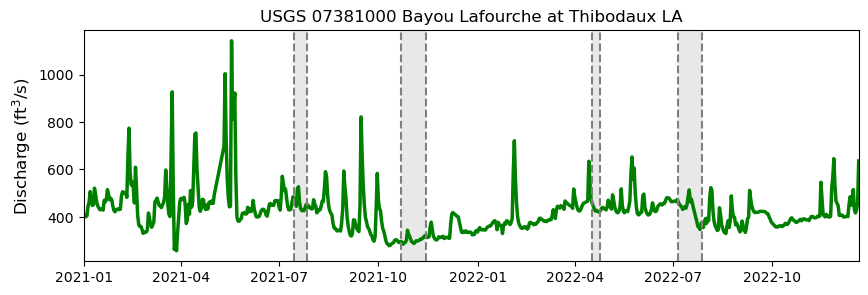

In [5]:
# Plotting
plt.figure(figsize=(10, 3))
plt.plot(df['datetime'], df['Discharge'], label='Discharge', color='green', linewidth=2.5)

plt.axvline(x=pd.to_datetime('2021-07-15'), color='grey', linestyle='--', label='July 15, 2021')
plt.axvline(x=pd.to_datetime('2021-07-27'), color='grey', linestyle='--', label='July 27, 2021')
plt.axvline(x=pd.to_datetime('2021-10-22'), color='grey', linestyle='--', label='July 15, 2021')
plt.axvline(x=pd.to_datetime('2021-11-14'), color='grey', linestyle='--', label='July 27, 2021')
plt.axvline(x=pd.to_datetime('2022-04-17'), color='grey', linestyle='--', label='July 15, 2021')
plt.axvline(x=pd.to_datetime('2022-04-24'), color='grey', linestyle='--', label='July 27, 2021')
plt.axvline(x=pd.to_datetime('2022-07-06'), color='grey', linestyle='--', label='July 15, 2021')
plt.axvline(x=pd.to_datetime('2022-07-28'), color='grey', linestyle='--', label='July 27, 2021')

# Shade the area between the two dates with transparent light grey
plt.axvspan(pd.to_datetime('2021-07-15'), pd.to_datetime('2021-07-27'), facecolor='lightgrey', alpha=0.5)
plt.axvspan(pd.to_datetime('2021-10-22'), pd.to_datetime('2021-11-14'), facecolor='lightgrey', alpha=0.5)
plt.axvspan(pd.to_datetime('2022-04-17'), pd.to_datetime('2022-04-24'), facecolor='lightgrey', alpha=0.5)
plt.axvspan(pd.to_datetime('2022-07-06'), pd.to_datetime('2022-07-28'), facecolor='lightgrey', alpha=0.5)

plt.title('USGS 07381000 Bayou Lafourche at Thibodaux LA')
plt.ylabel('Discharge ($\mathrm{ft^3/s}$)', fontsize=12)  # LaTeX formatting for units

# Set x-axis limits
plt.xlim(df['datetime'].min(), df['datetime'].max())


# Remove y-axis label
plt.savefig('../Dissertation_projects/Figures/OSM_figures/discharge_plot_al.png')
plt.show()


1.050842105263158


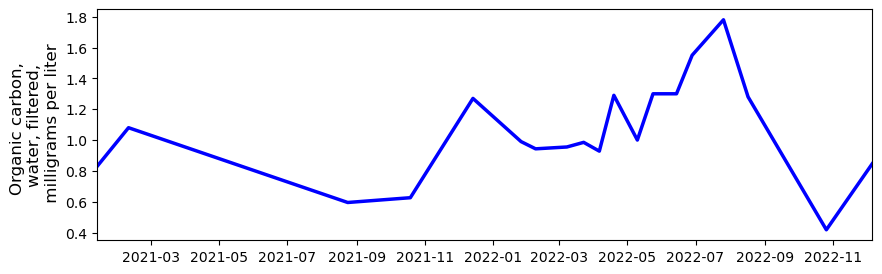

In [6]:
df = pd.read_csv('../Dissertation_projects/Data/river_discharge/USGS_Lab_data_Mississippi_River_Belle_Chasse_LA_edit.txt', 
                 index_col=0, delim_whitespace=True)

df = df[df['coll_ent_cd'] == '00618']
df['datetime'] = pd.to_datetime(df['sample_dt'])  
df['medium_cd'] = df['medium_cd'].astype(float)

plt.figure(figsize=(10, 3))

plt.plot(df['datetime'], df['medium_cd'], label='Organic carbon, water, filtered, milligrams per liter', color='blue', linewidth=2.5)
plt.xlim(df['datetime'].min(), df['datetime'].max())
plt.ylabel(r'Organic carbon, '+'\n'+'water, filtered,'+'\n'+' milligrams per liter', fontsize=12)  # LaTeX formatting for units

oc_mg_per_liter = df['medium_cd'].mean()

print(df['medium_cd'].mean())

In [10]:
oc_mg_per_liter
river_ft3_per_second

river_liter_per_second = river_ft3_per_second*28.317
river_liter_per_year = river_liter_per_second*60*60*24*365

oc_metton_per_liter = oc_mg_per_liter / 1e+9

oc_ton_per_year = oc_metton_per_liter * river_liter_per_year
print('Organic Carbon input ton / year:', oc_ton_per_year)

Organic Carbon input ton / year: 476822.8291402517
